# Landmark Recognition con Deep Belief Networks
-------------------------------------

<div style="text-align: right">Alfonso Irarrazaval · Gregory Schuit</div>
<div style="text-align: right">IIC3695 - Tópicos Avanzados de Inteligencia de Máquina</div>
<div style="text-align: right">Proyecto Semestral</div>
<div style="text-align: right">2019´1</div>


## 1. Introducción
-----------------
<div style="text-align: justify">
Alguna vez ha ocurrido que mientras revisas fotos de vacaciones pasadas, no puedes recordar exactamente que monumento o lugar histórico era ese para el que posaste tan felizmente? Para eso sirve el reconocimiento de Puntos de Referencia (Landmark Recognition de aquí en adelante), el que consiste precisamente en detectar que *Landmarks* están presentes en una foto [1].
</div>
<br>
<div style="text-align: justify">
Este es, en esencia, es un problema de reconocimiento de imagen, por lo que resulta intuitivo acudir a *Machine Learning* para encontrar su solución. El mayor obstaculo que enfrentan los problemas de este tipo es que hay demasiados *Landmarks* en que fijarse, por lo que se necesita un *dataset* muy grande para poder entrenar este modelo eficientemente. En este caso, ese detalle ha sido solucionado por Google®, ya que en su desafío presentado en Kaggle® [1] facilita el *dataset* mas grande de este tipo a la fecha.
</div>
<br>
<div style="text-align: justify">
El enfoque de este trabajo será centrado en *Bayesian Machine Learning*, específicamente en *Deep Belief Networks*, las cuales consideramos son un approach interesante para este tipo de problemas ya que permiten un aprendizaje modularizado de *features* (se detallará esto más adelante).
</div>
<br>
<div style="text-align: justify">
Se comenzará explicando la teoría detras de las *Deep Belief Networks*, detallando sus fundamentos probabilisticos y los elementos que las componen, para luego pasar al problema en cuestión y nuestra implementación de una posible solución.
</div>


## 2. Teoría
-----------------
### 2.1. Modelos Gráficos Probabilísticos
#### 2.1.1 Grafos dirigidos

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Bajo el contexto de la teoría de probabilidades, existe un campo de estudio dedicado a representar dependencias entre eventos mediante grafos. Uno de los principales objetivos por los que nacen estos modelos gráficos es poder factorizar una distribución conjunta mediante probabilidades condicionales. Por ejemplo, la siguiente ecuación factoriza la probabilidad conjunta según el gráfico de la figura.
</div>

![image.png](img/bayesian_network.PNG)

<div style="text-align: center">$P(a, b, c) = P(a)P(b | a)P(c | a,b)  $ </div>


<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;En general, la factorización guiada por una red de bayes se da según la siguiente fórmula:
</div>
<br>   
<div style="text-align: center">$P(x) = \prod_{k=1}^{K} P(x_{k}|pa_{k})$, </div>
<br>
<div style="text-align: justify">
donde $pa_{k}$ es el conjunto de todos los eventos que apuntan a $x_k$. Es importante notar que este tipo de grafos no puede poseer ciclos.
</div>
<br>  
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Este tipo de factorización resulta muy útil al momento de generar muestras de una distribución compleja de varias variables. En el ejemplo anterior, el proceso para generar muestras de la conjunta es el siguiente: primero se genera una muestra de $a$ según su propia distribución, luego, dada la muestra de $a$, podemos generar una muestra de $b$ de manera directa, y finalmente, dada las muestras de $a$ y de $b$, condicionamos a $c$ y extraemos una muestra. El resultado final de la muestra son los tres valores extraídos en el proceso. A este proceso se le denomina _ancestral sampling_.
</div>
<br>            
         
          
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;En el contexto de modelos de inferencia, estos grafos pueden simplicar mucho el cómputo de predicciones, incluyendo nodos para parámetros, priors, hiperparámetros, etc. Un ejemplo rápido es la regresión lineal bayesiana que se muestra a continuación. Para más detalle, ver (Bishop, 2006).
</div>

<img src="img/regresion_bayes_network.PNG" width="250">

#### 2.1.2. Grafos no-dirigidos
<br>                 
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Si bien las redes dirigidas descritas anteriormente simplifican de gran manera el modelamiento de problemas, podemos simplicar aún más las cosas para adecuarnos mejor a cierto tipo de problemas. Un problema de las redes dirigidas es que no se pueden modelar problemas sin generar ciclos (Koller & Friedman, Cap. 4.1, 2009). Además, el proceso de factorización dado un grafo extenso dirigido, que se realiza por medio de un algoritmo llamado _d-separation_, puede llegar a ser muy complejo (Bishop, 2006). En cambio, el proceso para determinar independencia entre grupos de nodos en un grafo no dirigido es mucho más simple. Considere la siguiente figura:</div>
<br>
<img src="img/red_no_dirigida.PNG" width="300">
<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Si queremos determinar si la relación $A \perp B\ |\ C\ $ (i.e. $A$ y $B$ son independientes dado $C$) se cumple, basta con mirar todos los caminos que van de $A$ a $B$, y ver si son bloquados por $C$. Si se cumple que todos los caminos pasan por $C$, se dice que $C$ bloquea los caminos, dejando a $A$ y $B$ independientes si se observa $C$. En caso de que exista al menos una conexión que no pase por $C$, la propiedad de independencia no necesariamente se cumple.
</div>
<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;En este tipo de grafos, llamados *Markov fields* o *Markov Networks*, cada arista posee un peso que puede interpretarse como una "afinidad" o "compatibilidad" entre los eventos que conecta. Es importante no confundir estos pesos con las probabilidades de los eventos o con las probabilidades condicionales. Estos pesos se denominan *factores*, y permiten factorizar una probabilidad conjunta de la siguiente forma:
</div>
<br>
<img src="img/misconception.PNG" width="150">
<br>
<div style="text-align: center">$P(A, B, C, D) = \phi(A, B) · \phi(B, C) ·\phi(C, D) ·\phi(A, D)$</div>
<br>
<div style="text-align: justify">
donde se logran plasmar relaciones de independencia entre $A$ y $C$ dados B y D, y entre $B$ y $D$ dados $A$ y $C$. Estas relaciones de independencia son imposibles de modelar mediante una red de bayes, tal y cómo se revisa en (Koller, Friedman, 2009), en donde se modela la situacion de 4 estudiantes ($A$, $B$, $C$ y $D$), que sólo se hablan entre los que sí poseen aristas, y que cada uno puede o no tener un mal entendido en la materia vista en clases. Este ejemplo es interesante, pero no se explicará porque sale del alcance de este informe.
</div>
<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;El modelamiento de probabilidades conjuntas mediante una red de markov, es una generalización del método de factorización visto anteriormente para redes de Bayes (basta con definir $\phi$ igual a las probabilidades condicionales que correspondan), por lo que la capacidad de modelamiento de una red de Markov resulta ser superior. 
</div>
<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Formalmente, definimos la probabilidad conjunta de un vector $x$ como la _distribución de Gibbs_, correspondiente a una red de Markov, tal y como sigue:
</div>
<br>
<div style="text-align: center">$P(x_1, ..., x_n) = \phi(D_1) · \phi(D_2) ··· \phi(D_m) · (1/Z)$</div>
<br>
<div style="text-align: justify">
siendo Z la constante de normalización sobre todos los posibles x.
</div>
<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Una propiedad importante de esta factorización es que, si {$D_1$, ..., $D_m$} es un conjunto de cliques de la red, entonces la factorización puede levarse a cabo. De esto se desprende directamente que si estos cliques son máximos, estamos reduciendo lo más posible la cantidad de parámetros de la distribución factorizada.   
</div>

### 2.2. Boltzmann Machines

&nbsp;&nbsp;&nbsp;&nbsp;Las máquinas de Boltzmann, nacen como grafos no dirigidos (i.e. redes de markov), y constan, además de pesos en cada arista, a factores para cada uno de sus nodos, logrando así una capacidad aún mayor de modelamiento. De esta forma, definimos la suma de los logaritmos de los factores de la red como:  
<br>
<img src="img/energy.PNG" width="400">
<br>

Esta función se denomina funcion de energía, y será la principal componente a optimizar en las RBM. La justificación de su uso se debe principalmente debido a todo lo dicho anteriormente, ya que por medio de pesos en aristas y nodos, se puede modelar la probabilidad conjunta de varias variables por medio de su relación entre ellas.

#### 2.2.2 Gibbs Sampling


&nbsp;&nbsp;&nbsp;&nbsp;Entrenar una RBM, significa poder hacer inferencia mediante muestreos de la distribución que queremos aproximar. En general, el principal método para esto es la maximización de la función de verosimilitud, o bien su logaritmo.
<br>
<img src="img/loglikRBM.PNG" width="300">
<br>
&nbsp;&nbsp;&nbsp;&nbsp;La idea principal de las RBM es lograr representar la distribución por medio de variables observadas, y variables latentes. De esta forma, la distribución de la RBM puede expresarse de la siguiente manera:
<br>
<img src="img/latent.PNG" width="250">
<br>

&nbsp;&nbsp;&nbsp;&nbsp;Gibbs Sampling es un método ampliamente ocupado de Markov Chain Monte Carlo, el cual puede ser visto como un caso particular del algoritmo Metropolis-Hastings [2].

&nbsp;&nbsp;&nbsp;&nbsp;Consideramos la siguiente distribución de la que deseamos samplear, la cual tiene algun estado inicial para la MC:  
<br>
<div style="text-align: center">$p(\Theta) = p(\theta_{1}, \theta_{2}, ... , \theta_{m})$</div>  
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Entonces, cada uno de los pasos de Gibbs consiste en reemplazar el valor de una de las variables $\theta_{i}$ por un valor sacado de la distribución de esa variable, condicionada por todas las demás variables del modelo
<br>
<div style="text-align: center">$p(\theta_{i}|\Theta - \{\theta_{i}\})$</div>  
<br>
Este proceso se repite reiteradas veces iterando sobre las variables.

&nbsp;&nbsp;&nbsp;&nbsp;En este caso, se utiliza Gibbs para simular la distribución de la *Markov Random Field* correspondiente.  
<br>
<div style="text-align: center">$MRF \rightarrow p(X) = p(X_{1}, X_{2}, ... , X_{m})$</div> 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;En cada iteración de gibbs se actualizará el estado de la MRF a $p(X^{t}) = p(X*{t}_{1}, X^{t}_{2}, ... , X^{t}_{m})$$




### 2.3 Deep Belief Networks (DBN's)     

<br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Luego de haber introducido a las *Boltzmann Machines*, procederemos a explicar cómo estas estucturas pueden apilarse para conformar una red neuronal profunda. La principal ventaja de éste método es que es posible alcanzar un nivel de entrenamiento superior a otra red neuronal del mismo tamaño mediante un pre-entrenamiento *greedy* de cada máquina de boltzmann por separado. El procedimiento es detallado en (Hinton, Osindero, Teh, 2006). A continuación se muestra un resumen de cómo se lleva a cabo el entrenamiento.
</div>
<br>
<img src="img/dbn.PNG" width="150">
<br>
&nbsp;&nbsp;&nbsp;&nbsp;La idea principal del procedimiento es condicionar cada capa de la red, siendo cada una de ellas una RBM. La distribución conjunta de la red viene dada por:
<br>
<img src="img/jointDBN.PNG" width="350">
<br>



<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Lo primero, es entrenar la primera capa, que vendrían siendo los valores observados directamente de la base de datos. Como dijimos anteriormente, estopuede realizarse con gibbs sampling, iterando entre vector observado y vector latente. Segundo, dada la capa oculta recien entrenada, iterar con la siguiente capa oculta. Esto se repite dependiendo de que tan profunda se quiere que sea la red. Finalmente se realiza un proceso de fine-tuning de los parámetros. Detalles del proeso de fine-tuning pueden encontrarse en (Hinton, Salakhutdinov, 2006).
</div>

### 2.3 Image Recognition with DBN's

## 3. Problema
-----------------
Como se mencionó anteriormente, lo que se desea en este trabajo es desarrollar un algoritmo que se adhiera al principio de *Bayesian Machine Learning* para detectar correctamente si es que una foto presenta un landmark o no, y entregar el id de aquel landmark en caso de un resultado psitivo.

### 3.1 Descripción de datos

Los datos a utilizar corresponden al dataset expuesto en [1], pero dado que este dataset contiene >2.000.00 de imágenes y pesa >400GB, para efectos de simplicidad se utilizará un subset de éste que contiene todas las imágenes de los 14 *landmarks* con más imágenes presentes en el dataset (lo que de igual manera corresponde a 116.610 imágenes en 30.9 GB). El método de extracción de estas imagenes se detalla en el archivo downloader.py.  
La información se encuentra separada en 2 partes: 
+ Conjunto de imágenes en formato *.jpg* con landmarks presentes en ellas.
+ CSV relacionando nombre de archivo con landmark presente
En otras palabras, el archivo de imágenes corresponderá a el input de nuestro algoritmo, y del csv obtendremos el target respectivo. 

### 3.2 Approach propuesto


Para abordar el problema se utilizará una librería de python llamada deep-belief-network **[8]**, la cual contiene varios métodos para los cuales sirven las DBN. Es importante resaltar que esta librería fue elegida por dos razones:
+ 1) Funciona sobre TensorFlow. lo que resulta importante al momento de trabajar con grandes datasets como el que usaremos
+ 2) Uliliza el método de Gibbs Sampling para el entrenamiendo de las capas RBM que contiene, siguiendo la linea de lo expuesto en el punto 2.2.2    
+ 3) Es relativamente simple de utilizar


##### 3.2.1 Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import isfile

import keras
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
from dbn.tensorflow import SupervisedDBNClassification as DBNC
from dbn.utils import to_categorical

Using TensorFlow backend.


##### 3.2.2 Preprocesamiento de imágenes

Esta primera parte es para demostrar el como se manejaron las imágenes y como entrenó el modelo, pero luego usaremos un modelo ya entrenado para mostrar los resultados.

In [2]:
pti = 'images/train/' # Path To Images
ext = '.jpg' # Image extension

# Cargar datos sobre archivos en pd Dataframe
traindata = pd.read_csv("train.csv") 

# Agregar a los nombres de los archivos los paths y extensiones correspondientes
traindata['filename'] = traindata['filename'].apply(lambda x: pti + x + ext)

traindata.shape

(116610, 3)

In [3]:
# Based on: https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/

# Creación de vector de inputs al modelo
train_images = []

color = "grayscale" # Se elige la escala de grises para mantener simple el modelo
img_size = (96, 128) # Tamaño de pixeles a considerar 3:4 ratio (alto:ancho)
img_ratio = 0.05 # 5% de las imagenes serán usadas, importante para no consumir toda la ram

for i in tqdm(range(int(traindata.shape[0] * img_ratio))):
    
    # Cargamos la imagen correspondiente en blanco y negro, y con el tamaño deseado
    img = image.load_img(traindata['filename'][i], target_size=img_size, color_mode=color) # El cambiar el graysacale hace que el shape tenga profundidad 3
    # pasamos la imagen a una matriz de grayscale pixels
    img = image.img_to_array(img)
    # Escalamos el valor de cada pixel (255 -> 1)
    img = img/255
    # Flatten por que la librería utilizada recibe inputs de una dimensión
    train_images.append(img.flatten())

# Transformamos nuestro vector de inputs en un np array
X = np.array(train_images) 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5830/5830 [01:04<00:00, 89.99it/s]


[0.5411765  0.5411765  0.54509807 ... 0.05490196 0.08627451 0.16862746]


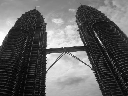

In [4]:
# Ejemplo de imagen, y su vector obtenido
img = image.load_img(traindata['filename'][np.random.randint(0, int(traindata.shape[0] * img_ratio))], target_size=(96,128), color_mode="grayscale")
print(image.img_to_array(img).flatten()/255)
img

In [5]:
# Definición de vector de objetivos para el vector de inputs obtenido anteriormente

targets = traindata["landmark_id"][:int(traindata.shape[0] * img_ratio)]

In [6]:
# Split de datos

X_train, X_test, y_train, y_test = train_test_split(X, targets, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4664, 12288), (1166, 12288), (4664,), (1166,))

##### 3.2.3 Entrenamiento del modelo

In [ ]:
# Training
classifier = DBNC(hidden_layers_structure=[512, 256, 256],
                  learning_rate_rbm=0.05, # learning rate para RBM pretraining
                  learning_rate=0.1, # Learning rate para el backpropagation de los nodos
                  n_epochs_rbm=10, # Epochs para RBM pretraining (n epochs x capa)
                  n_iter_backprop=100, # Packpropagation iterations
                  batch_size=46, # Tamaño de batch
                  activation_function='sigmoid', # Función de activación
                  dropout_p=0.1) # Dropout de nodos para evitar overfitting

classifier.fit(X_train, y_train) # Entrenamiento del modelo según datos procesados en 3.2.2

##### 3.2.4 Obtención de  resultados con modelo ya entrenado

In [7]:
# En primer lugar, cargamos los datos
tclassifier = DBNC.load('model.pkl')

# Datos trained classifier
tclassifier, tclassifier.unsupervised_dbn.hidden_layers_structure

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


(SupervisedDBNClassification(batch_size=46, dropout_p=0.1,
               idx_to_label_map={0: 10900, 1: 6651, 2: 9779, 3: 8063, 4: 5376, 5: 2061, 6: 8429, 7: 6696, 8: 5554, 9: 1553, 10: 4352, 11: 13526, 12: 2743},
               l2_regularization=1.0,
               label_to_idx_map={10900: 0, 6651: 1, 9779: 2, 8063: 3, 5376: 4, 2061: 5, 8429: 6, 6696: 7, 5554: 8, 1553: 9, 4352: 10, 13526: 11, 2743: 12},
               learning_rate=0.1, n_iter_backprop=100, verbose=True),
 [256, 256])

In [8]:
# Predicción de test
y_pred = tclassifier.predict(X_test)

In [9]:
# Análisis de resultados
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        1553       0.57      0.41      0.47        64
        2061       0.55      0.53      0.54       126
        2743       0.52      0.53      0.52        97
        4352       0.39      0.44      0.41        85
        5376       0.58      0.48      0.52        94
        5554       0.71      0.76      0.73        90
        6651       0.39      0.53      0.45        96
        6696       0.38      0.53      0.44        78
        8063       0.47      0.40      0.43        43
        8429       0.43      0.54      0.48        65
        9779       0.46      0.49      0.47       172
       10900       0.47      0.21      0.29        72
       13526       0.40      0.27      0.32        84

   micro avg       0.48      0.48      0.48      1166
   macro avg       0.48      0.47      0.47      1166
weighted avg       0.49      0.48      0.48      1166

[[26  8  5  2  0  0  4  3  1  5  8  0  2]
 [ 2 67  6  6  0  4  8 12  1  8  8  1

##### 3.2.5 Análisis de resultados

Se obserba una precisión 48%, lo que significa una mejora significante sobre random para 13 clases (~7,7%), por lo que podemos decir que nuestra modelación logró aprender en alguna medida caracterísiticas de ciertos landmarks. Esto se ve reflejado especialemente en el landmark de *id* 5554, el cual tuvo una precisión de 71% al momento de su clasificación. Esto puede ser explicado con que, como se ve a continuación, este landmark corresponde a las Torres Petronas, las cuales están rodeadas de pocas edificaciones u objetos que podrían entorpecer su detección. También, debido a su forma, este landmark es fotografiado casi siempre de ángulos similares, haciendo su detección un poco mas trivial (usando una definición muy amplia de trivial).  

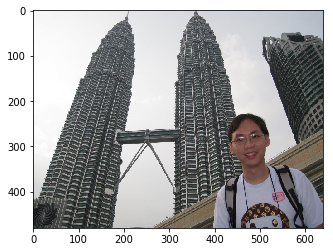

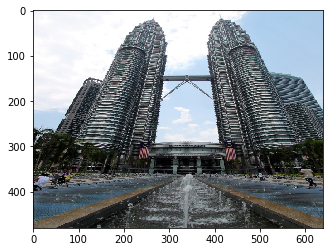

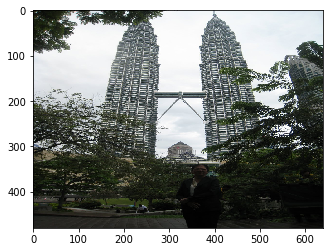

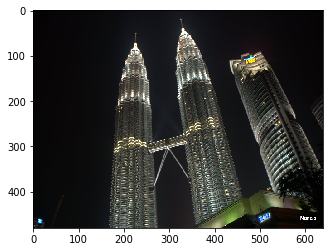

In [10]:
img1 = image.load_img(traindata['filename'][traindata.landmark_id == 5554].iloc[0], target_size=(480,640))
img2 = image.load_img(traindata['filename'][traindata.landmark_id == 5554].iloc[1], target_size=(480,640))
img3 = image.load_img(traindata['filename'][traindata.landmark_id == 5554].iloc[2], target_size=(480,640))
img4 = image.load_img(traindata['filename'][traindata.landmark_id == 5554].iloc[3], target_size=(480,640))

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()
plt.imshow(img4)
plt.show()

Uno de los *landmarks* que peor resultados mostro, por otro lado corresponde a un edificio cuyas fotos se puede observar no son muy descriptivas del mismo, de hecho es dificil establecer a simple vista una relación entre las primeras 4 fotos encontradas:

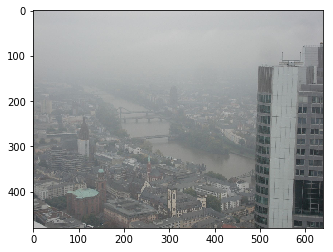

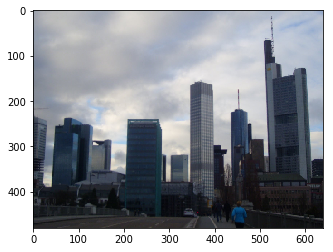

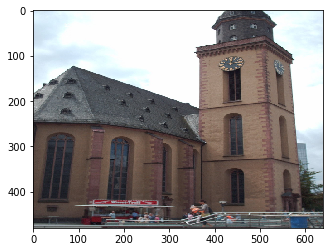

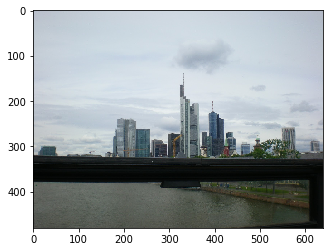

In [11]:
img1 = image.load_img(traindata['filename'][traindata.landmark_id == 10900].iloc[0], target_size=(480,640))
img2 = image.load_img(traindata['filename'][traindata.landmark_id == 10900].iloc[1], target_size=(480,640))
img3 = image.load_img(traindata['filename'][traindata.landmark_id == 10900].iloc[2], target_size=(480,640))
img4 = image.load_img(traindata['filename'][traindata.landmark_id == 10900].iloc[3], target_size=(480,640))

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()
plt.imshow(img4)
plt.show()

## 4. Conclusión

Si bien los resultados obtenidos no son tan buenos como se pensó, se logró obtener una clasificación relativamente buena de algunos *landmarks*, como fue en el caso de las Torres Petronas. Esto demuestra que DBN puede ser utilizado para la clasificación de landmarks, pero es necesario aplicar varios ajustes y mejoras para disminuir errores.

Tal vez una de las mayores fuentes de error en nuestro modelamiento corresponde a el asumir el input como un vector de valores, en vez de una matriz, pero esto corresponde a una variable innevitable dada la implementación disponible para el problema. De ser posible ingresar la imagen como matriz, en vez de un solo vector, se podría extraer aún más features de las imágenes, al obtener no solo relaciones horizontales entre los pixeles, sino que además una relacion espacial de dos dimensiones entre conjuntos de pixeles vecinos. Y en un caso ideal, considerar además el utilizar los colores de las imágenes (*landmarks*) como otro canal caracterísitico de ellos, ya que si bien dos edificios pueden ser muy similares, pueden diferir en sus colores y establecer ahí una diferencia. 

Otro gran obstáculo al momento de resolver este problema fue la capacidad de cómuputo disponible, ya que en el caso de querer usar más imágenes para entraining, o agregar más layers, o aumentar el batch size, se consumía toda la RAM disponible en el computador, botando la ejecución. Se intentó trabajar en google colab para enfrentar esto, pero tampoco fue suficiente. En caso de poder aumentar la capacidad de computo sería además posible aplicar ambos puntos expresados en el párrafo anterior (características espaciales y colores), permitiendo seguramente una mejor clasificación

Para tener en consideración en trabajos futuros sobre el tema de clasificación de imágenes con DBN, resulta escencial considerar la opción de una mezcla de modelos, donde uno corresponde a una red con capas convolucionales para detectar distintos patrones en la imagen, y que luego ésta se conecte a una DBN para el análisis y especificación más profunda de los atributos encontrados en la capa anterior.

## 5. Referencias - Bibliografía

**[ 1 ]**  *Google Landmark Recognition Challenge* https://www.kaggle.com/c/landmark-recognition-challenge  
**[ 2 ]**  Bishop, C. M. (2006). *Pattern recognition and machine learning*. Springer.  
**[ 3 ]**  Koller, D., & Friedman, N. (2009). *Probabilistic graphical models: principles and techniques*. MIT press.  
**[ 4 ]**  Fischer, A., & Igel, C. (2012, September). *An introduction to restricted Boltzmann machines. In Iberoamerican Congress on Pattern Recognition* (pp. 14-36). Springer, Berlin, Heidelberg.   
**[ 5 ]**  Montúfar, G. (2016, June). *Restricted Boltzmann Machines: Introduction and Review. In Information Geometry and its Applications IV* (pp. 75-115). Springer, Cham.  
**[ 6 ]**  G.E. Hinton and R.R. Salakhutdinov, *Reducing the Dimensionality of Data with Neural Networks*, Science, 28 July 2006, Vol. 313. no. 5786, pp. 504 - 507.
**[ 7 ]**  	G.E. Hinton, S. Osindero, and Y. Teh, “A fast learning algorithm for deep belief nets”, Neural Computation, vol 18, 2006   
**[ 8 ]**  [A Python implementation of Deep Belief Networks built upon NumPy and TensorFlow with scikit-learn compatibility](https://github.com/albertbup/deep-belief-network)    
**[ 9 ]**  
**[ 10 ]** 